> library dependencies

+ itunes API searcher
    + ```$ pip install pyitunes```

In [1]:
import itunes
import pandas as pd 
import matplotlib.pyplot as plt
import bs4 as bs
import urllib.request
import numpy as np
import seaborn as sns

### this script implements a wrapper for the [iTunes Search Api](https://developer.apple.com/library/archive/documentation/AudioVideo/Conceptual/iTuneSearchAPI/Searching.html)
+ it plots:
    + MIN/MAX values of "Years podcast has published"
    + MIN/MAX values "Minutes of podcast episodes"
    
#### each podcast has a media URL, so the script can be extended for Natural Language Processing of each podcast

In [2]:
# for example
item = itunes.search (query='star wars')
print (item)

[<Feature-Movie>: Star Wars: The Force Awakens, <Feature-Movie>: Star Wars: The Phantom Menace, <Feature-Movie>: Star Wars: The Empire Strikes Back, <Tv-Episode>: R2 Come Home, <Feature-Movie>: Star Wars: Return of the Jedi, <Feature-Movie>: Star Wars: A New Hope, <Feature-Movie>: Star Wars: Attack of the Clones, <Feature-Movie>: Star Wars: Revenge of the Sith, <Podcast>: Rebel Force Radio: Star Wars Podcast, <Tv-Episode>: Bombad Jedi, <Tv-Episode>: An Old Friend, <Tv-Episode>: Weapons Factory, <Tv-Episode>: The Lawless, <Tv-Episode>: Citadel Rescue, <Tv-Episode>: Point of No Return, <Tv-Episode>: Bounty, <Song>: Star Wars, <Tv-Episode>: Ambush, <Tv-Episode>: The Box, <Tv-Episode>: Rising Malevolence, <Tv-Episode>: Rookies, <Tv-Episode>: The Unknown, <Tv-Episode>: Downfall of a Droid, <Tv-Episode>: Defenders of Peace, <Tv-Episode>: Sacrifice, <Tv-Episode>: Mystery of the Thousand Moons, <Tv-Episode>: Shadow of Malevolence, <Tv-Episode>: Hostage Crisis, <Tv-Episode>: Conspiracy, <Tv-Epi

## This is optimizes to audit podcasts (instead of music albums)
### Un-Comment your query term and Run All Cells
### ⇩


In [3]:
# queryterm = 'infectious disease'
queryterm = 'cystic fibrosis'
# queryterm = 'genetic'
# queryterm = 'covid19'

podsearch = itunes.search(query=queryterm, media='podcast')

In [4]:
for p in podsearch:
    print (p)

<Podcast>: Breathe In: A Cystic Fibrosis Podcast
<Podcast>: Breaking Through
<Podcast>: Cystic Fibrosis Review
<Podcast>: Cystic Fibrosis Podcast
<Podcast>: Cystic Fibrosis
<Podcast>: Cystic Fibrosis in Focus
<Podcast>: My Journey With Cystic Fibrosis
<Podcast>: AHEAD OF THE CURVE: Cystic Fibrosis
<Podcast>: Just Livin Life with Cystic Fibrosis
<Podcast>: Living With Cystic Fibrosis
<Podcast>: Jerry Unplugged: A Cystic Fibrosis Podcast
<Podcast>: Gene Therapy with Cystic Fibrosis
<Podcast>: Fearless with A Fearful Illness | A Cystic Fibrosis Podcast


In [5]:
# each item in that list of Podcast search results looks like this
print (vars(podsearch[0]))

{'id': 1299822342, 'name': 'Breathe In: A Cystic Fibrosis Podcast', 'url': 'https://podcasts.apple.com/us/podcast/breathe-in-a-cystic-fibrosis-podcast/id1299822342?uo=4', '_release_date': None, 'artwork': {'30': 'https://is3-ssl.mzstatic.com/image/thumb/Podcasts113/v4/76/fc/f9/76fcf922-0fb2-9465-17ae-a69c52d05280/mza_8694591701698332440.jpg/30x30bb.jpg', '60': 'https://is3-ssl.mzstatic.com/image/thumb/Podcasts113/v4/76/fc/f9/76fcf922-0fb2-9465-17ae-a69c52d05280/mza_8694591701698332440.jpg/60x60bb.jpg', '600': 'https://is3-ssl.mzstatic.com/image/thumb/Podcasts113/v4/76/fc/f9/76fcf922-0fb2-9465-17ae-a69c52d05280/mza_8694591701698332440.jpg/600x600bb.jpg'}, 'json': {'wrapperType': 'track', 'kind': 'podcast', 'collectionId': 1299822342, 'trackId': 1299822342, 'artistName': 'Gunnar Esiason and the Salty Cysters', 'collectionName': 'Breathe In: A Cystic Fibrosis Podcast', 'trackName': 'Breathe In: A Cystic Fibrosis Podcast', 'collectionCensoredName': 'Breathe In: A Cystic Fibrosis Podcast', 

### ⇪ A little wierd, looks like most of what we want is packed into
### a "JSON" attribute, so...lets' go get it!

- - -

# Lookup 'summary info' about this Podcast Channel

+ name
+ no. of individual episodes / how long been published
+ length posts (minutes)
+ etc.


In [6]:
print (f'There are {len(podsearch)} podcast channels\n')
for channel in podsearch:
    print (f'{channel.json["trackCount"]} podcasts in the "{channel.json["collectionName"]}" channel, (with id = {channel.id})')
    print (f'The last post in this channel was {channel.json["releaseDate"]}, here is iTunes page listing episodes in this channel:')
    print (f'{channel.json["collectionViewUrl"]}\n')

There are 13 podcast channels

99 podcasts in the "Breathe In: A Cystic Fibrosis Podcast" channel, (with id = 1299822342)
The last post in this channel was 2019-12-05T11:00:00Z, here is iTunes page listing episodes in this channel:
https://podcasts.apple.com/us/podcast/breathe-in-a-cystic-fibrosis-podcast/id1299822342?uo=4

22 podcasts in the "Breaking Through" channel, (with id = 1404167309)
The last post in this channel was 2020-03-25T19:04:00Z, here is iTunes page listing episodes in this channel:
https://podcasts.apple.com/us/podcast/breaking-through/id1404167309?uo=4

47 podcasts in the "Cystic Fibrosis Review" channel, (with id = 300355725)
The last post in this channel was 2017-10-26T13:00:00Z, here is iTunes page listing episodes in this channel:
https://podcasts.apple.com/us/podcast/cystic-fibrosis-review/id300355725?uo=4

208 podcasts in the "Cystic Fibrosis Podcast" channel, (with id = 1425889980)
The last post in this channel was 2019-07-25T20:37:00Z, here is iTunes page li

## 'iTunes Collection Preview' page only lists the first few episodes
### Unfortunately for each channel Apple requires you to hit a button to 'Load More', while the podcast publisher's feed (not by Apple) includes ALL podcasts, so looks like we'll be scraping the FeedURL

In [7]:
# "feedUrl" is not consistenly present, so must handle missing Attributes/Keys errors
# definition to write podcast channel info to arrays
def writeKeys(channel):
    channel_number.append(channel.id)
    channel_name.append(channel.json["collectionName"])
    channel_episodecount.append(channel.json["trackCount"])
    channel_itunespreview.append(channel.json["collectionViewUrl"])
    # feedURL is not consistently present
    try:
       channel_feed.append(channel.json["feedUrl"])
    except KeyError as e:
        print (f'{e} does not exist in "{channel.json["collectionName"]}" channel')
        channel_feed.append(None)

In [8]:
# Create arrays for channels dataframe
channel_number = []
channel_name = []
channel_episodecount = []
channel_itunespreview = []
channel_feed = []

# Populate arrays
for channel in podsearch:
    writeKeys(channel)

# create a "Channels" dataframe from arrays
data = {'ID': channel_number,
        'CHANNEL_NAME': channel_name,
        'EPISODE_COUNT': channel_episodecount,
        'ITUNES_PREVIEW_URL': channel_itunespreview,
        'PUBLISHER_FEED': channel_feed
       }
channels = pd.DataFrame(data,columns=['ID','CHANNEL_NAME','EPISODE_COUNT','ITUNES_PREVIEW_URL','PUBLISHER_FEED'])
channels

,ID,CHANNEL_NAME,EPISODE_COUNT,ITUNES_PREVIEW_URL,PUBLISHER_FEED
0,1299822342,Breathe In: A Cystic Fibrosis Podcast,99,https://podcasts.apple.com/us/podcast/breathe-...,http://feeds.soundcloud.com/users/soundcloud:u...
1,1404167309,Breaking Through,22,https://podcasts.apple.com/us/podcast/breaking...,https://feeds.blubrry.com/feeds/breaking_throu...
2,300355725,Cystic Fibrosis Review,47,https://podcasts.apple.com/us/podcast/cystic-f...,http://feeds.feedburner.com/eCysticFibrosis
3,1425889980,Cystic Fibrosis Podcast,208,https://podcasts.apple.com/us/podcast/cystic-f...,http://feeds.soundcloud.com/users/soundcloud:u...
4,1482970186,Cystic Fibrosis,1,https://podcasts.apple.com/us/podcast/cystic-f...,https://anchor.fm/s/efa8fa8/podcast/rss
5,1158237157,Cystic Fibrosis in Focus,4,https://podcasts.apple.com/us/podcast/cystic-f...,https://reachmd.com/rss/itunes/517/
6,1123362319,My Journey With Cystic Fibrosis,15,https://podcasts.apple.com/us/podcast/my-journ...,http://feeds.feedburner.com/MyJourneyWithCF
7,716909092,AHEAD OF THE CURVE: Cystic Fibrosis,27,https://podcasts.apple.com/us/podcast/ahead-of...,http://feeds.feedburner.com/AheadOfTheCurveCys...
8,1367526604,Just Livin Life with Cystic Fibrosis,4,https://podcasts.apple.com/us/podcast/just-liv...,http://feeds.soundcloud.com/users/soundcloud:u...
9,1451304302,Living With Cystic Fibrosis,14,https://podcasts.apple.com/us/podcast/living-w...,https://feeds.simplecast.com/9p8q_0Xo


## Next: create an "Episodes" dataframe
### Constructed from each individual podcast episode in the (non-Apple) publisher's Feed

In [9]:
# query each feed URL and return all the podcast info in each as an object:
def getEpisodeList(url):
    # since we request info from the messy web, let's add some error handling
    try:
        request = urllib.request.Request(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36'})
        source = urllib.request.urlopen(request)
    except urllib.error.HTTPError as e:
        print (f'Failed {e}: {url}')
        return None
    try:
        soup = bs.BeautifulSoup(source,'lxml')
        episodes = soup.find_all('item')
    except AttributeError as e:
        return None
    return episodes

In [10]:
# write episode info to arrays
def writeEpisode(row):
    if (row["PUBLISHER_FEED"]!=None):
        # this is where you extract and append the individual Episode keys
        # repeating the Channel ID & Channel Title for each episode
        r = getEpisodeList(row["PUBLISHER_FEED"])
        for x in r:
            episode_titles.append(x.text)
            channel_ids.append(row["ID"])
            channel_names.append(row["CHANNEL_NAME"])
            try:
                length = x.find("itunes:duration")
                episode_length.append(length.text)
            except:
                episode_length.append(None)
            try:
                published_on = x.pubdate
                episode_published.append(published_on.text)
            except:
                episode_published.append(None)
            try:
                url = x.guid
                episode_mediaurls.append(url.text)
            except:
                episode_mediaurls.append(None)                 

In [11]:
# Create arrays for episodes dataframe
channel_ids = [] # To match back to channels dataframe
channel_names = [] # Ditto, for legibility
episode_titles = []  # just cuz they bothered to name their podcasts
episode_published = [] # to create a MIN/MAX range of 'dates published'
episode_length = []  # to create a MIN/MAX range of 'episode durations'
episode_mediaurls = []  # to get the podcast an convert to text

# Populate arrays
channels.apply(writeEpisode, axis = 1)

# create an "Episodes" dataframe from arrays
data = {'ID': channel_ids,
        'CHANNEL_NAME': channel_names,
        'EPISODE_TITLE': episode_titles,
        'EPISODE_TIMECODE': episode_length,
        'EPISODE_PUBLISHED': episode_published,
        'EPISODE_URL': episode_mediaurls
       }
episodes = pd.DataFrame(data, columns =['ID','CHANNEL_NAME','EPISODE_TITLE','EPISODE_TIMECODE','EPISODE_PUBLISHED','EPISODE_URL'])

#### Now we need to convert these fields to values we can run MIN/MAX calculations on. 

+ Let's start with:
    + minutes = total minutes of episode
    + years = year episode was published

In [12]:
# Minutes are in TIMECODE, need to be converted to raw minutes
def totalMinutes(row):
    # A lot of the podcasts are missing durations! (..strange...)
    if not (row is None):
        # if duration does not list hours
        if (len(row.split(':')))==2:
            minutes, seconds = row.split(':')
            total_min = int(minutes)
            return total_min
        # if 'hours' are listed
        elif (len(row.split(':')))==3:
            hours, minutes, seconds = row.split(':')
            total_min = int(hours)*60 + int(minutes)
            return total_min
    else:
        return None

In [13]:
# compute total minutes fron the duration timecodes:
episodes["EPISODE_TOTAL_MINUTES"] = episodes["EPISODE_TIMECODE"].apply(totalMinutes)

# Extract the year published from the DATETIME:

episodes['EPISODE_YEAR'] = episodes.EPISODE_PUBLISHED.str.extract(r'(\d\d\d\d)', expand = True)
episodes.EPISODE_YEAR = episodes.EPISODE_YEAR.apply(pd.to_numeric, downcast = 'integer')

In [14]:
# Function to write the MIN / MAX ranges from Episodes dataframe back to the Channel summary dataframe
def defineRanges(dfone,dftwo):
    filtered = dfone[dfone.PUBLISHER_FEED.notnull()]
    dfone["FIRST_YEAR"] = ""
    for f in filtered.ID:
        episode_list = dftwo.loc[dftwo['ID']==f]
        minimum_year = episode_list.EPISODE_YEAR.min()
        maximum_year = episode_list.EPISODE_YEAR.max()
        minimum_length = episode_list.EPISODE_TOTAL_MINUTES.min()
        maximum_length = episode_list.EPISODE_TOTAL_MINUTES.max()
#         print(f'For this channel, first year is {minimum_year}. Last year is {maximum_year}')
#         print(f'And the shortest podcast is {minimum_length} minutes. Longest podcast is {maximum_length} minutes\n')
        dfone.loc[dfone["ID"]==f,"FIRST_YEAR"] = minimum_year
        dfone.loc[dfone["ID"]==f,"LAST_YEAR"] = maximum_year 
        dfone.loc[dfone["ID"]==f,"MIN_PODCAST_LENGTH"] = minimum_length     
        dfone.loc[dfone["ID"]==f,"MAX_PODCAST_LENGTH"] = maximum_length        

In [15]:
# Write Publish / Duration ranges back to Channel dataframe
defineRanges(channels, episodes)

# Drop the empty FeedURLs which (will have no data)
channels.dropna(subset = ["PUBLISHER_FEED"], inplace = True)
channels.reset_index(drop=True, inplace=True)
channels

,ID,CHANNEL_NAME,EPISODE_COUNT,ITUNES_PREVIEW_URL,PUBLISHER_FEED,FIRST_YEAR,LAST_YEAR,MIN_PODCAST_LENGTH,MAX_PODCAST_LENGTH
0,1299822342,Breathe In: A Cystic Fibrosis Podcast,99,https://podcasts.apple.com/us/podcast/breathe-...,http://feeds.soundcloud.com/users/soundcloud:u...,2017,2019.0,0.0,72.0
1,1404167309,Breaking Through,22,https://podcasts.apple.com/us/podcast/breaking...,https://feeds.blubrry.com/feeds/breaking_throu...,2018,2020.0,NaN,NaN
2,300355725,Cystic Fibrosis Review,47,https://podcasts.apple.com/us/podcast/cystic-f...,http://feeds.feedburner.com/eCysticFibrosis,2002,2017.0,5.0,41.0
3,1425889980,Cystic Fibrosis Podcast,208,https://podcasts.apple.com/us/podcast/cystic-f...,http://feeds.soundcloud.com/users/soundcloud:u...,2018,2019.0,2.0,76.0
4,1482970186,Cystic Fibrosis,1,https://podcasts.apple.com/us/podcast/cystic-f...,https://anchor.fm/s/efa8fa8/podcast/rss,2019,2019.0,NaN,NaN
5,1158237157,Cystic Fibrosis in Focus,4,https://podcasts.apple.com/us/podcast/cystic-f...,https://reachmd.com/rss/itunes/517/,2016,2020.0,0.0,0.0
6,1123362319,My Journey With Cystic Fibrosis,15,https://podcasts.apple.com/us/podcast/my-journ...,http://feeds.feedburner.com/MyJourneyWithCF,2016,2018.0,0.0,0.0
7,716909092,AHEAD OF THE CURVE: Cystic Fibrosis,27,https://podcasts.apple.com/us/podcast/ahead-of...,http://feeds.feedburner.com/AheadOfTheCurveCys...,2008,2015.0,20.0,109.0
8,1367526604,Just Livin Life with Cystic Fibrosis,4,https://podcasts.apple.com/us/podcast/just-liv...,http://feeds.soundcloud.com/users/soundcloud:u...,2018,2018.0,20.0,48.0
9,1451304302,Living With Cystic Fibrosis,14,https://podcasts.apple.com/us/podcast/living-w...,https://feeds.simplecast.com/9p8q_0Xo,2019,2020.0,0.0,51.0


## Now: Let's plot that
### We'll create a 'Range Plot' to show these two MIN/MAX ranges

In [16]:
# Lot of NaN wierdness in this list of durations...because so many missing 'Durations'
# Let's create an index of the absolute ranges for DURATIONS and YEARS, with no missing values:
MinutesIndex = pd.Index(episodes.EPISODE_TOTAL_MINUTES[np.logical_not(np.isnan(episodes.EPISODE_TOTAL_MINUTES))])

#less funkiness with years
YearsIndex = pd.Index(episodes.EPISODE_YEAR[np.logical_not(np.isnan(episodes.EPISODE_YEAR))])
YearsIndex

Float64Index([2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019.0,
              2019.0, 2019.0,
              ...
              2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2018.0, 2018.0, 2020.0,
              2020.0, 2020.0],
             dtype='float64', name='EPISODE_YEAR', length=443)

In [17]:
#Create an Index of the years, to plot against
minutesaudit = pd.DataFrame(index=set(MinutesIndex))
yearsaudit = pd.DataFrame(index=set(YearsIndex)).sort_index(ascending = True)
minutesaudit.index.name = "MINUTES_RANGE"
yearsaudit.index.name = "YEARS_RANGE"
minutesaudit

""
MINUTES_RANGE
0.0
2.0
3.0
4.0
5.0
...
79.0
81.0
96.0


In [18]:
yearsaudit.index = yearsaudit.index.astype(int) # use astype to strip out decimal points

In [19]:
# Write the ranges to the "Years Published" dataframe

for i in range (channels.shape[0]):
    print(i+1)
    print (f'{channels.loc[i].CHANNEL_NAME}\n{channels.loc[i].EPISODE_COUNT} episodes')
    print (int(channels.loc[i].FIRST_YEAR))
    print (int(channels.loc[i].LAST_YEAR))
    yearsaudit[channels.loc[i].CHANNEL_NAME] = yearsaudit.index.to_series().apply(lambda x: i+1 if x >= int(channels.loc[i].FIRST_YEAR) and x <= int(channels.loc[i].LAST_YEAR) else np.NaN)

1
Breathe In: A Cystic Fibrosis Podcast
99 episodes
2017
2019
2
Breaking Through
22 episodes
2018
2020
3
Cystic Fibrosis Review
47 episodes
2002
2017
4
Cystic Fibrosis Podcast
208 episodes
2018
2019
5
Cystic Fibrosis
1 episodes
2019
2019
6
Cystic Fibrosis in Focus
4 episodes
2016
2020
7
My Journey With Cystic Fibrosis
15 episodes
2016
2018
8
AHEAD OF THE CURVE: Cystic Fibrosis
27 episodes
2008
2015
9
Just Livin Life with Cystic Fibrosis
4 episodes
2018
2018
10
Living With Cystic Fibrosis
14 episodes
2019
2020
11
Jerry Unplugged: A Cystic Fibrosis Podcast
2 episodes
2018
2018
12
Gene Therapy with Cystic Fibrosis
1 episodes
2020
2020
13
Fearless with A Fearful Illness | A Cystic Fibrosis Podcast
2 episodes
2020
2020


In [20]:
# Write the ranges to the "Length of Podcasts" dataframe

for i in range (channels.shape[0]):
#     print(i+1)
#     print (channels.loc[i].CHANNEL_NAME)
#     print (int(channels.loc[i].FIRST_YEAR))
#     print (int(channels.loc[i].LAST_YEAR))
    if (channels.loc[i].MIN_PODCAST_LENGTH != None):
        minutesaudit[channels.loc[i].CHANNEL_NAME] = minutesaudit.index.to_series().apply(lambda x: i+1 if x >= channels.loc[i].MIN_PODCAST_LENGTH and x <= channels.loc[i].MAX_PODCAST_LENGTH else np.NaN)
    else:
        pass


In [21]:
ticks = []
names = []
for i in range (channels.shape[0]+1):
    ticks.append(i+1)
for i in range (channels.shape[0]):    
    names.append(channels.loc[i].CHANNEL_NAME + '\n(' + str(channels.loc[i].EPISODE_COUNT)+ ' podcasts)')

In [22]:
names

['Breathe In: A Cystic Fibrosis Podcast\n(99 podcasts)',
 'Breaking Through\n(22 podcasts)',
 'Cystic Fibrosis Review\n(47 podcasts)',
 'Cystic Fibrosis Podcast\n(208 podcasts)',
 'Cystic Fibrosis\n(1 podcasts)',
 'Cystic Fibrosis in Focus\n(4 podcasts)',
 'My Journey With Cystic Fibrosis\n(15 podcasts)',
 'AHEAD OF THE CURVE: Cystic Fibrosis\n(27 podcasts)',
 'Just Livin Life with Cystic Fibrosis\n(4 podcasts)',
 'Living With Cystic Fibrosis\n(14 podcasts)',
 'Jerry Unplugged: A Cystic Fibrosis Podcast\n(2 podcasts)',
 'Gene Therapy with Cystic Fibrosis\n(1 podcasts)',
 'Fearless with A Fearful Illness | A Cystic Fibrosis Podcast\n(2 podcasts)']

In [23]:
yearsaudit

,Breathe In: A Cystic Fibrosis Podcast,Breaking Through,Cystic Fibrosis Review,Cystic Fibrosis Podcast,Cystic Fibrosis,Cystic Fibrosis in Focus,My Journey With Cystic Fibrosis,AHEAD OF THE CURVE: Cystic Fibrosis,Just Livin Life with Cystic Fibrosis,Living With Cystic Fibrosis,Jerry Unplugged: A Cystic Fibrosis Podcast,Gene Therapy with Cystic Fibrosis,Fearless with A Fearful Illness | A Cystic Fibrosis Podcast
2002,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,3.0,NaN,NaN,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Setup some Seaborn styling
sns.set(style="dark", rc={"lines.linewidth": 8.0})
sns.set_context("talk", rc={"font.size":50,"axes.titlesize":50,"axes.labelsize":50,"lines.linewidth": 8.0})

Text(0.5, 0, '')

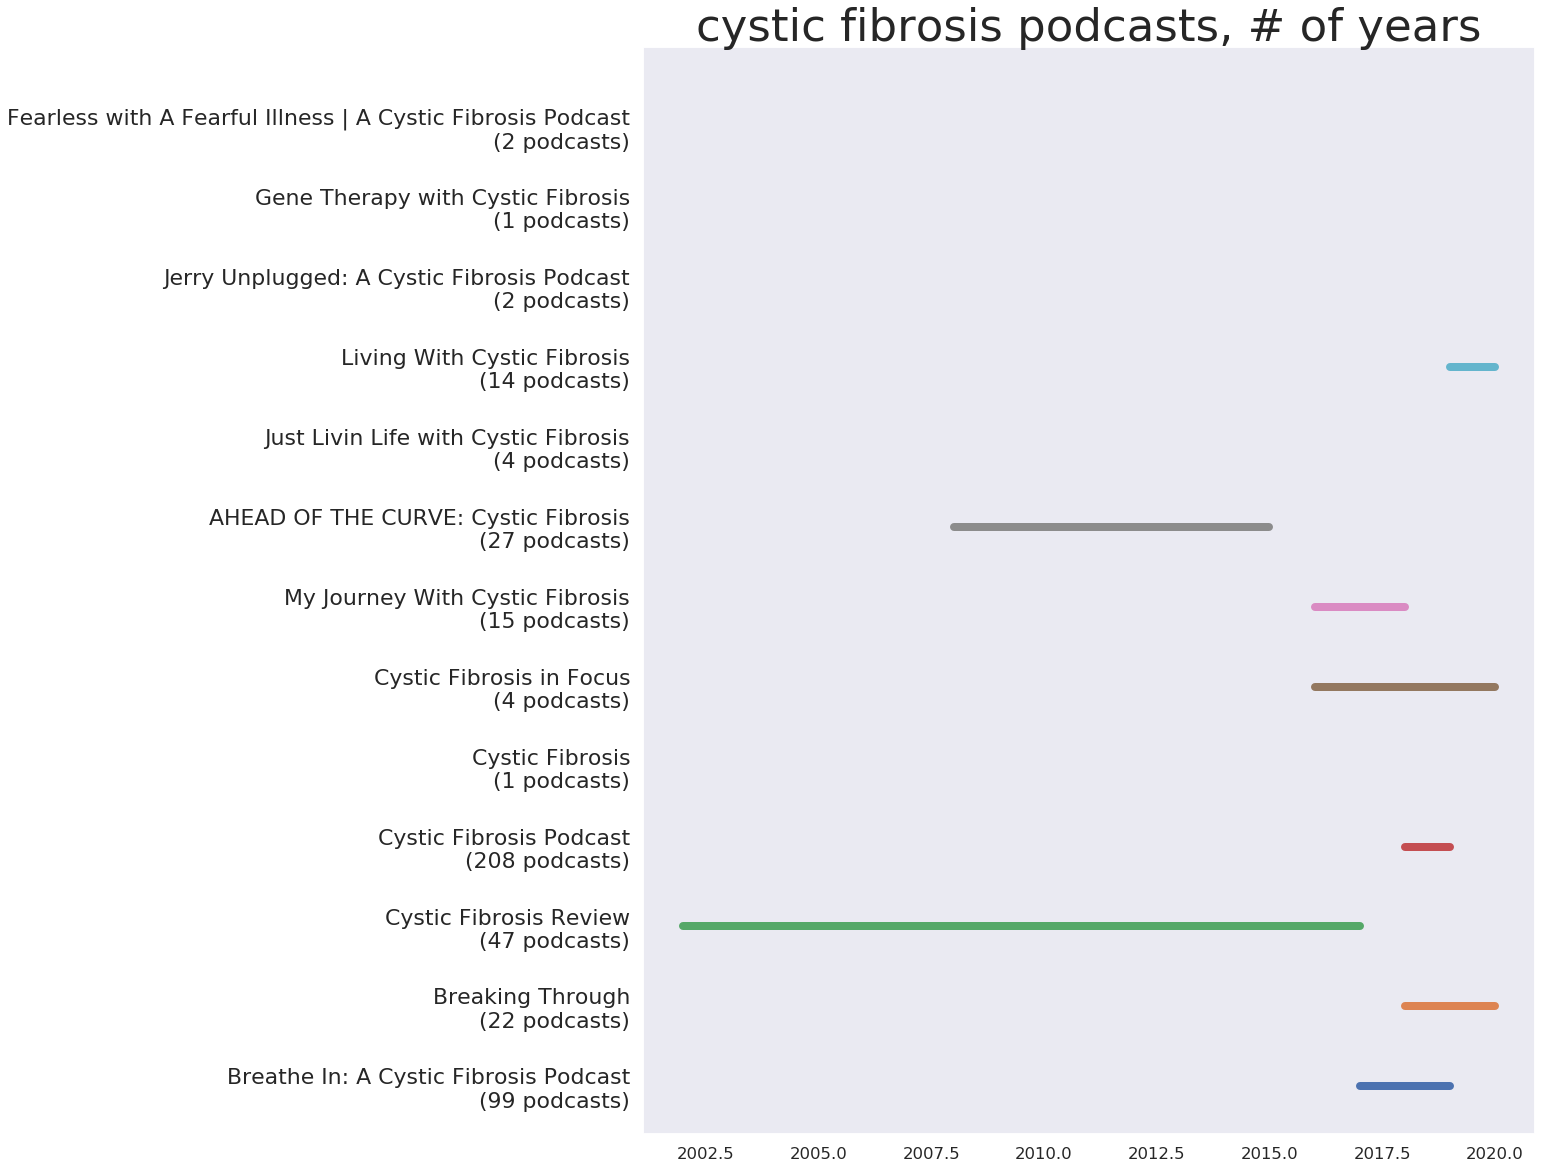

In [45]:
# plot Channel Summary
p = yearsaudit.plot.line(figsize = (16, 20), legend=False)
p.axes.set_title(f'{queryterm} podcasts, # of years',fontsize = 45)
p.set_yticks(ticks)
p.set_yticklabels(names,fontsize=22)
p.set_xlabel('')

In [26]:
minutesaudit

,Breathe In: A Cystic Fibrosis Podcast,Breaking Through,Cystic Fibrosis Review,Cystic Fibrosis Podcast,Cystic Fibrosis,Cystic Fibrosis in Focus,My Journey With Cystic Fibrosis,AHEAD OF THE CURVE: Cystic Fibrosis,Just Livin Life with Cystic Fibrosis,Living With Cystic Fibrosis,Jerry Unplugged: A Cystic Fibrosis Podcast,Gene Therapy with Cystic Fibrosis,Fearless with A Fearful Illness | A Cystic Fibrosis Podcast
MINUTES_RANGE,,,,,,,,,,,,,
0.0,1.0,NaN,NaN,NaN,NaN,6.0,7.0,NaN,NaN,10.0,NaN,NaN,NaN
2.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
3.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
4.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
5.0,1.0,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, '')

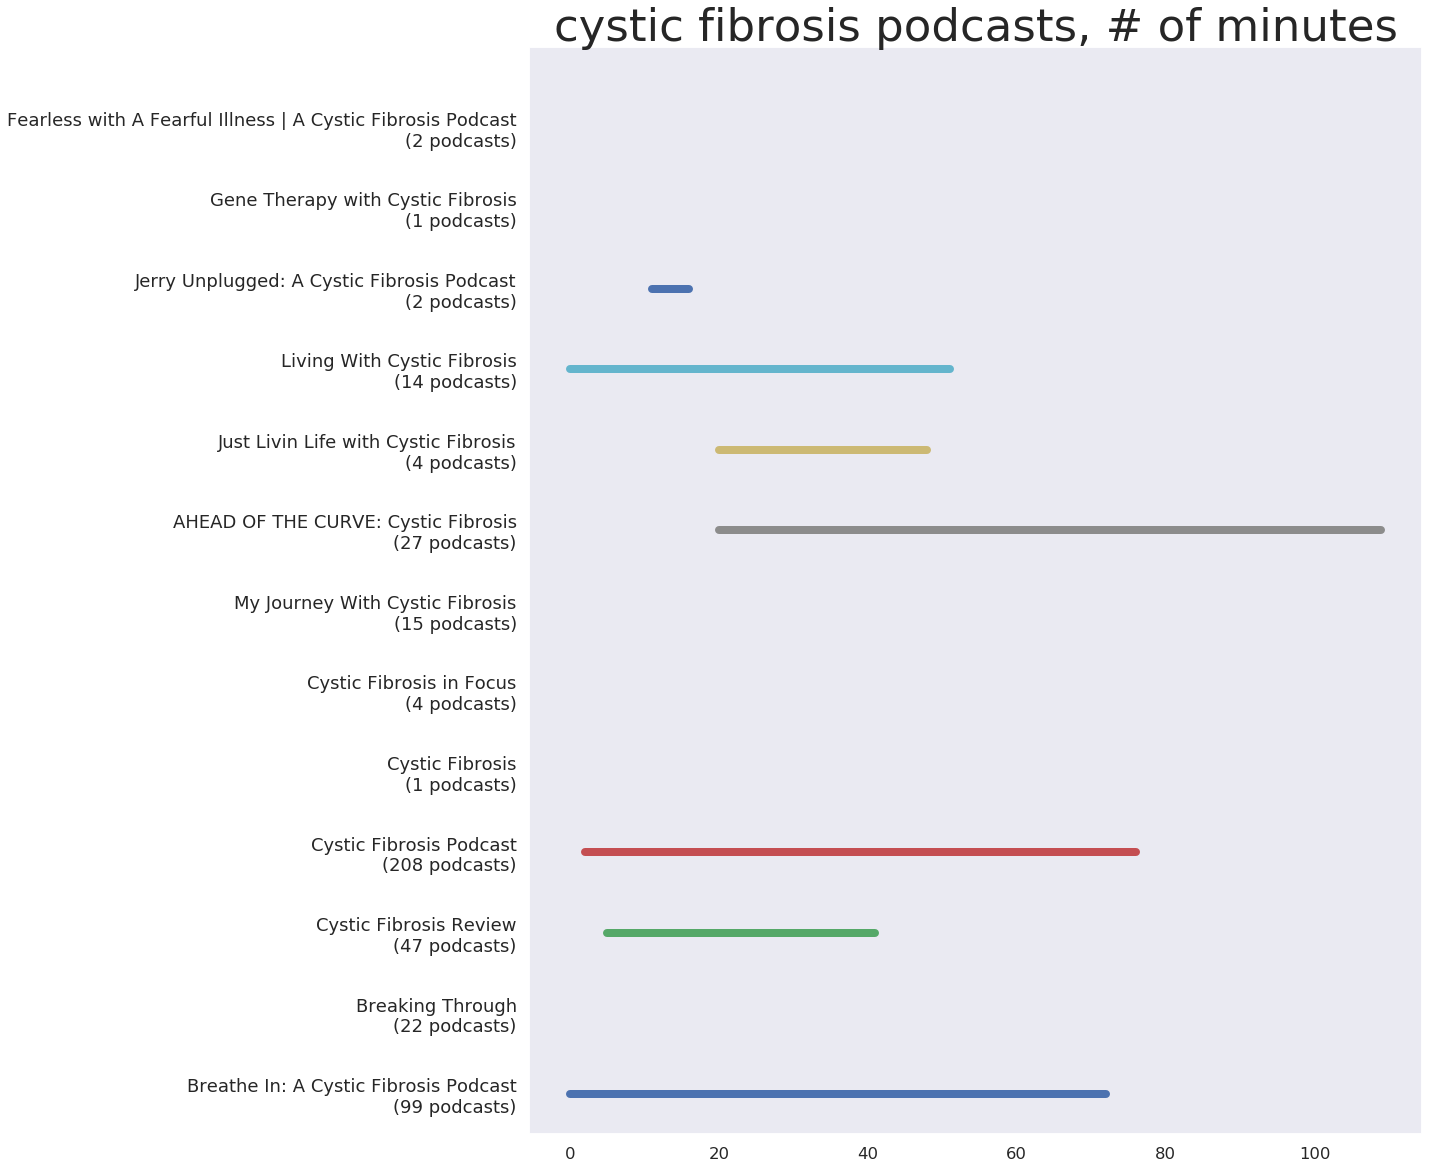

In [46]:
# plot Episode summary
q = minutesaudit.plot.line(figsize = (16, 20), legend=False)
q.axes.set_title(f'{queryterm} podcasts, # of minutes',fontsize = 45)
q.set_yticks(ticks)
q.set_yticklabels(names,fontsize=18)
q.set_xlabel('')